"'X' wins!"

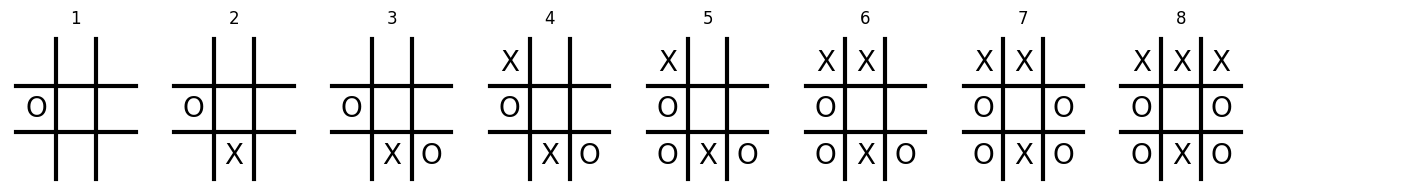

In [1]:
import numpy as np
from numpy.random import default_rng

rng = default_rng()

import matplotlib.pyplot as plt


'''
Determine if either player has won
'''
def check_board(board):
    rows, cols = board.shape
    assert rows == cols, "check_board() assumes a square board."
    for row in range(rows):
        if abs(sum(board[row])) == rows:
            return 1
        if abs(sum(board[:, row])) == rows:
            return 1
    if abs(sum(board.diagonal())) == rows:
        return 1
    if abs(sum(np.flip(board, 0).diagonal())) == rows:
        return 1
    return 0


'''
Draw Matplotlib board
'''
def draw_board(axes, board, round):
    axes[round].set(title=round + 1)
    axes[round].axis("off")
    axes[round].plot([0.5, 0.5], [-0.5, 2.5], color="black", linewidth=3)
    axes[round].plot([1.5, 1.5], [-0.5, 2.5], color="black", linewidth=3)
    axes[round].plot([-0.5, 2.5], [0.5, 0.5], color="black", linewidth=3)
    axes[round].plot([-0.5, 2.5], [1.5, 1.5], color="black", linewidth=3)

    taken_spaces = np.where(board != 0)
    for i in range(len(taken_spaces[0])):
        if board[taken_spaces[0][i], taken_spaces[1][i]] == 1:
            axes[round].annotate(
                "X",
                (taken_spaces[0][i], taken_spaces[1][i]),
                size=20,
                ha="center",
                va="center",
            )
        else:
            axes[round].annotate(
                "O",
                (taken_spaces[0][i], taken_spaces[1][i]),
                size=20,
                ha="center",
                va="center",
            )

'''
Plays 1 round of TicTacToe. Draws the board each turn.
'''
def play_game():
    fig, axes = plt.subplots(1, 9, figsize=(18, 2))
    board = np.zeros((3, 3))

    player = [1, -1][rng.integers(2)]  # Randomly pick first player
    player_dict = {1: "X", -1: "O"}

    for round in range(9):

        available_moves = np.where(board == 0)
        num_moves = len(available_moves[0])

        if num_moves == 0:
            return "Draw!"
        else:
            random_choice = rng.integers(num_moves)
            board[
                available_moves[0][random_choice], available_moves[1][random_choice]
            ] = player
            # for i in range(num_moves):
            #   print(available_moves[0][i], available_moves[1][i])

        draw_board(axes, board, round)

        if check_board(board) == 1:

            # Don't show remaining boards
            for remaining_axes in axes[round:9]:
                remaining_axes.axis("off")

            return f"'{player_dict[player]}' wins!"

        player = player * -1  # Alternate player each round


play_game()

In [2]:
# Populate board for testing
board = np.zeros((3, 3))
player = [1, -1][rng.integers(2)]
for round in range(9):
  available_moves = np.where(board == 0)
  num_moves = len(available_moves[0])
  random_choice = rng.integers(num_moves)
  board[available_moves[0][random_choice], available_moves[1][random_choice]] = player
  player = player * -1
board

array([[-1.,  1., -1.],
       [ 1.,  1.,  1.],
       [ 1., -1., -1.]])